# Free Vibrations

---

**You can edit the exercises directly in the cells.**<br>
- **Jupyter notebook quick start:**
- \<Shift>+\<Return> --> runs a cell
- ! --> shell escape [! Linux command line]
- use a (above) and b (below) left of the [ ] to open new cells
&nbsp;<br>;<br>

## Exercise 1: Vibrations of a Cantilever Beam after Impact

### 1. Problem Description
A mass $m = 5 \text{ kg}$ is dropped onto the free end of a cantilever beam with an initial velocity $v_0 = 0.5 \text{ m/s}$. The mass sticks to the beam, causing it to vibrate. In this analysis, we study the fundamental harmonic motion relative to the static equilibrium position.

### 2. Theoretical Background
The cantilever beam acts as a linear spring. The equivalent stiffness ($k$) of a cantilever beam with a point load at its end is:

$$k = \frac{3EI}{L^3}$$

**Parameters:**
* $E$ - Young's Modulus ($210 \times 10^9 \text{ Pa}$)
* $I$ - Moment of inertia ($3 \times 10^{-6} \text{ m}^4$)
* $L$ - Length ($2.1 \text{ m}$)

The equation of motion is a 2nd-order ODE:
$$m\ddot{x} + kx = 0$$

<img src="fig/ex1.png" width="600"> 

---

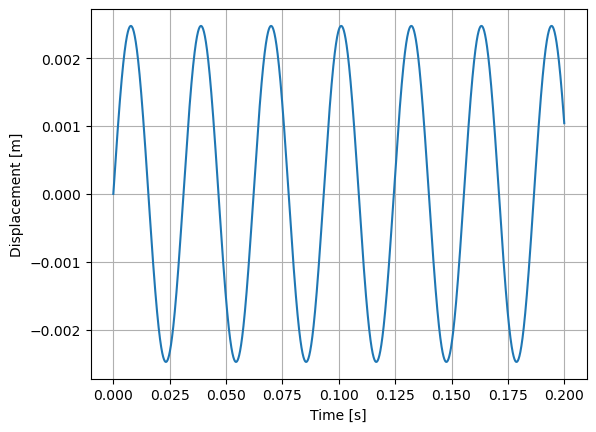

Equivalent stiffness k = 2.04e+05 N/m
Natural frequency ω_n = 202.03 rad/s
Maximum dynamic displacement = 2.4749e-03 m


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
m = 5.0                 # mass [kg]
v0 = 0.5                # impact velocity [m/s]
y0 = 0                  # initial position [m]
E = 210e9               # Young's modulus [Pa]
I = 3e-6                # second moment of area [m^4]
L = 2.1                 # beam length [m]

# Equivalent stiffness of cantilever beam
k = 3 * E * I / L**3    # [N/m]

# Natural circular frequency
omega_n = np.sqrt(k / m)

# Time vector
t = np.linspace(0, 0.2, 4000)

# Dynamic displacement relative to static equilibrium
A = np.sqrt(y0**2 + (v0 / omega_n)**2)
x = A * np.sin(omega_n * t)

# Plot
plt.figure()
plt.plot(t, x)
plt.xlabel("Time [s]")
plt.ylabel("Displacement [m]")
plt.grid(True)
plt.show()

# Print key results
print(f"Equivalent stiffness k = {k:.2e} N/m")
print(f"Natural frequency ω_n = {omega_n:.2f} rad/s")
print(f"Maximum dynamic displacement = {v0/omega_n:.4e} m")


---
### Exercise 1.1: Effect of Initial Velocity

Simulate the response for three different impact velocities: $v_0^0$ = 0.5 m/s, $v_0^1$ = 1.0 m/s, and $v_0^2$ = 2.0 m/s. Plot all three responses on a single graph. Does the period change when the velocity increases? What happens to the maximum displacement?

As
$$x_0 = 0$$ 
then
$$A = \frac{v_0}{w_n}$$


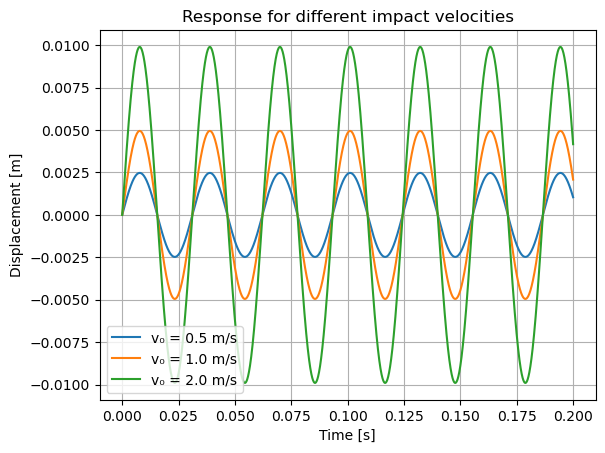

In [6]:
import numpy as np
import matplotlib.pyplot as plt

m = 5.0
E = 210e9
I = 3e-6
L = 2.1
k = 3 * E * I / L**3
omega_n = np.sqrt(k / m)
t = np.linspace(0, 0.2, 3000)

# Impact velocities
velocities = [0.5, 1.0, 2.0]

plt.figure()
for v0 in velocities:  #Takes each velocity from the velocities one by one and uses it for calculation
    x = (v0 / omega_n) * np.sin(omega_n * t)
    plt.plot(t, x, label=f"v₀ = {v0} m/s")

plt.xlabel("Time [s]")
plt.ylabel("Displacement [m]")
plt.title("Response for different impact velocities")
plt.legend()
plt.grid(True)
plt.show()


#### Conclusions


Increasing the impact velocity does not change the vibration period, since the natural frequency depends only on the system's mass and stiffness.

However, the maximum dynamic displacement increases linearly with the impact velocity.
This confirms the system's linear behaviour.

### Exercise 1.2: Effect of Mass

Simulate and compare the vibration for $m$ = 5 kg, $m$ = 20 kg and $m$ = 50 kg. How does it affect the natural frequency?

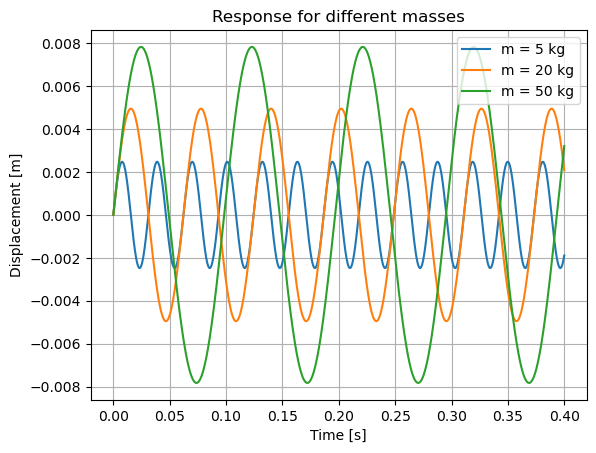

In [7]:
import numpy as np
import matplotlib.pyplot as plt

E = 210e9        
I = 3e-6         
L = 2.1          
k = 3 * E * I / L**3
v0 = 0.5 
t = np.linspace(0, 0.4, 4000)

# Masses to compare
masses = [5, 20, 50]

plt.figure()
for m in masses:
    omega_n = np.sqrt(k / m)
    x = (v0 / omega_n) * np.sin(omega_n * t)
    plt.plot(t, x, label=f"m = {m} kg")

plt.xlabel("Time [s]")
plt.ylabel("Displacement [m]")
plt.title("Response for different masses")
plt.legend()
plt.grid(True)
plt.show()


#### Conclusions

Increasing the mass decreases the natural frequency, since the frequency is inversely proportional to the square root of mass.

As a result, heavier masses vibrate more slowly, while lighter masses oscillate faster for the same beam stiffness.

### Exercise 1.3: Effect of Beam Length

Compare two different beam lengths: long beam: $L$ = 2.1 m and short beam: $L$ = 1 m. If you want to reduce the vibration amplitude of a machine part without changing its weight, should you make the supporting beam longer or shorter?

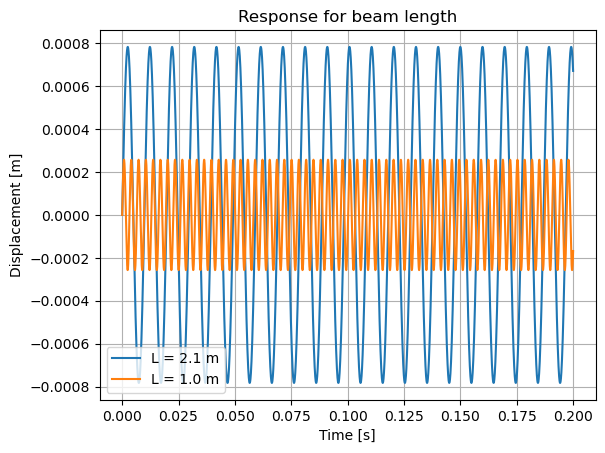

In [10]:
import numpy as np
import matplotlib.pyplot as plt

E = 210e9        
I = 3e-6          
m = 0.5
v0 = 0.5 
t = np.linspace(0, 0.2, 3000)

# Masses to compare
lengths = [2.1, 1.0]

plt.figure()
for L in lengths:
    k = 3 * E * I / L**3
    omega_n = np.sqrt(k / m)
    x = (v0 / omega_n) * np.sin(omega_n * t)
    plt.plot(t, x, label=f"L = {L} m")

plt.xlabel("Time [s]")
plt.ylabel("Displacement [m]")
plt.title("Response for beam length")
plt.legend()
plt.grid(True)
plt.show()


#### Conclusions

Reducing the beam length increases the system's natural frequency, causing the mass to vibrate at a much higher frequency.

A stiffer beam (shorter $L$) experiences smaller peak displacements compared to a more flexible, longer beam when subjected to the same impact velocity.